# Step-by-step Creating a maximum likelihood t-test in Python

Hi, this is a tutorial on how to code a t-test using maximum likelihood in Python. This tutorial will explain how to create separate negative log-likelihood functions for the null and alternate model as well as produce a t-test that compares these models.

## Stats language:

Before we jump into the code, we need to define the statistical models for the t-test. The two models are the **null model** and the **alternative model**. 

In the null model of a t-test, we hypothesize that there is no difference between the means of two populations. We describe the model using the equation:

$$y = \beta_0 + ε$$

In the alternative model, we hypothesize that there is a significance between the means.

$$y = \beta_0 + \beta_1x + ε$$

## Complete code:

In [ ]:
import pandas
import numpy
import scipy.stats
from scipy.optimize import minimize
from plotnine import *

#Import our data set
data = pandas.read_csv("chickwts.txt")

#Graph a summary plot of means for each seed type
ggplot(data=data) + geom_bar(aes(x='factor(feed)', y='weight'), stat = "summary", fun_y = numpy.mean) + theme_classic() + xlab("feed type") + ylab("mean weight")

#A function to return the negative log-likelihood for a given observation
def nllike (p, obs):
    B0 = p[0]
    B1 = p[1]
    sigma = p[2]
    expected = B0 + B1 * obs.x
    nll = -1 * scipy.stats.norm(expected, sigma).logpdf(obs.y).sum()
    return nll

#A function to return the negative log-likelihood for the null model
def nllike_null (p, obs):
    B0 = p[0]
    sigma = p[1]
    expected = B0
    nll = -1 * scipy.stats.norm(expected, sigma).logpdf(obs.y).sum()
    return nll

#function for returning p-value for t-test
def ttest (data, group1, group2, x, y):
    #define a temporary slice of the data
    temp_df = data[(data[x]==group1) | (data[x]==group2)]
    
    #Make new column 'x' set as 0 or 1 based on group
    temp_df["x"] = 0
    temp_df["x"][temp_df[x] == group2] = 1
    temp_df["y"] = temp_df[y]
    
    # y = B0 + B1*x + E
    model = minimize(nllike, [1, 1, 1], method = "Nelder-Mead", options={'disp': True}, args = temp_df)
    
    # y = B0 + E
    null_model = minimize(nllike_null, [1, 1], method = "Nelder-Mead", options={'disp': True}, args = temp_df)
    
    #Get differences in fit
    D = (null_model.fun - model.fun) * 2
    
    #Use chi3.sf() for returning p-value
    p = scipy.stats.chi2.sf(D,1)
    
    #Print results
    print ("-----------------------------")
    print (group1 + " vs. " + group2)
    print ("p-value = " + str(p))
    if p <= 0.05:
        print ("Significance")
    else:
        print ("No significance")
    print ("-----------------------------")

#Perform t-tests
ttest(data, group1="horsebean", group2="casein", x="feed", y="weight")

## Step 1: Importing our tools and dataset

We import pandas, numpy, scipy.stats, minimize from scipy.optimize, and all functions from plotnine (this is different than *import plotnine*).

We then use pandas.read_csv() to import a text file as a pandas Dataframe.

In [ ]:
import pandas
import numpy
import scipy.stats
from scipy.optimize import minimize
from plotnine import *

#Import our data set
data = pandas.read_csv("chickwts.txt")

We can check whether the data have been loaded. The dataframe contains 70 rows of feed types and the chick weights produced from that type of feed.

In [9]:
print data

    weight       feed
0      179  horsebean
1      160  horsebean
2      136  horsebean
3      227  horsebean
4      217  horsebean
5      168  horsebean
6      108  horsebean
7      124  horsebean
8      143  horsebean
9      140  horsebean
10     309    linseed
11     229    linseed
12     181    linseed
13     141    linseed
14     260    linseed
15     203    linseed
16     148    linseed
17     169    linseed
18     213    linseed
19     257    linseed
20     244    linseed
21     271    linseed
22     243    soybean
23     230    soybean
24     248    soybean
25     327    soybean
26     329    soybean
27     250    soybean
28     193    soybean
29     271    soybean
..     ...        ...
41     226  sunflower
42     320  sunflower
43     295  sunflower
44     334  sunflower
45     322  sunflower
46     297  sunflower
47     318  sunflower
48     325   meatmeal
49     257   meatmeal
50     303   meatmeal
51     315   meatmeal
52     380   meatmeal
53     153   meatmeal
54     263

We can visualize the data using the following line of code, which creates a bar graph of mean chick weights by feed type.

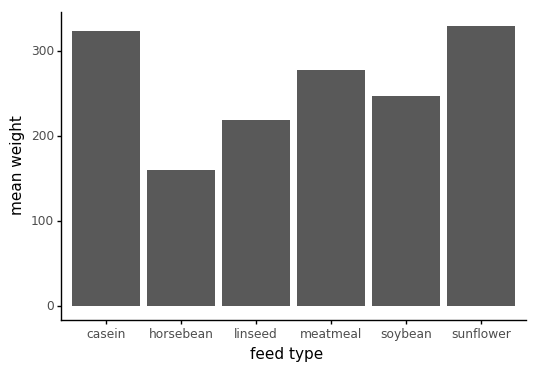

<ggplot: (6866962)>

In [10]:
#Graph a summary plot of means for each feed type
ggplot(data=data) + geom_bar(aes(x='factor(feed)', y='weight'), stat = "summary", fun_y = numpy.mean) + theme_classic() + xlab("feed type") + ylab("mean weight")

## Step 2: Defining functions for computing negative loglikelihood for the models

Here, we'll be coding two functions to calculate the negative loglikelihood for a given observation for each of our models.
Remember, the equation for the null model is:
$$y = \beta_0 + ε$$

The equation for the alternative model is:

$$y = \beta_0 + \beta_1x + ε$$

We'll start with the null model.

**First define the function**

In [ ]:
def nllike_null (p, obs):

**Now we will unpack the parameters**

Here, *p* is a list of two terms: the intercept (β0) and the error (ε)

In [ ]:
def nllike_null (p, obs):
    B0 = p[0]
    sigma = p[1]

**We calculate the expected value (y).**

*Where's the error in the formula? Stick around to find out!*

In [ ]:
def nllike_null (p, obs):
    B0 = p[0]
    sigma = p[1]
    expected = B0

**Then we calculate the negative loglikelihood (nll)**

The error *sigma* pops back in this equation. We then return nll.

In [ ]:
def nllike_null (p, obs):
    B0 = p[0]
    sigma = p[1]
    expected = B0
    nll = -1 * scipy.stats.norm(expected, sigma).logpdf(obs.y).sum()
    return nll

***Our completed function for the negative loglikelihood for the null model:***

In [ ]:
#A function to return the negative log-likelihood for the null model
def nllike_null (p, obs):
    B0 = p[0]
    sigma = p[1]
    expected = B0
    nll = -1 * scipy.stats.norm(expected, sigma).logpdf(obs.y).sum()
    return nll

**We then create a similar function for the alternative model:**

Notice that we have more parameters to unpack as well as another term in the expected variable. *Why B1 * obs.x?*

In [ ]:
#A function to return the negative log-likelihood for a given observation
def nllike (p, obs):
    B0 = p[0]
    B1 = p[1]
    sigma = p[2]
    expected = B0 + B1 * obs.x
    nll = -1 * scipy.stats.norm(expected, sigma).logpdf(obs.y).sum()
    return nll

## Step 3: Creating a function for the t-test

Finally, we get to the actual test. We will create a function with four parameters.

    data will be our dataset
    group1 will be the feed type compared
    group2 will be the second feed type compared
    x is the independent categorical variable, i.e. "feed"
    y is the response variable, i.e. "weight"

In [ ]:
#function for returning p-value for t-test
def ttest (data, group1, group2, x, y):

**We'll just subset the data, named *temp_df* of the feed types that we're only interested**

In [ ]:
#function for returning p-value for t-test
def ttest (data, group1, group2, x, y):
    #define a temporary slice of the data
    temp_df = data[(data[x]==group1) | (data[x]==group2)]

**We'll create a new column called *x* in *temp_df* called x with the values as 0 or 1 depending on the feed type of the row.**

**We then make another new column called *y* that's just a copy of the response column**

In [ ]:
#function for returning p-value for t-test
def ttest (data, group1, group2, x, y):
    #define a temporary slice of the data
    temp_df = data[(data[x]==group1) | (data[x]==group2)]
    
    #Make new column 'x' set as 0 or 1 based on group
    temp_df["x"] = 0
    temp_df["x"][temp_df[x] == group2] = 1
    temp_df["y"] = temp_df[y]

**We use *minimize* in the scipy package to calculate the fit for the two models.**

In [ ]:
#function for returning p-value for t-test
def ttest (data, group1, group2, x, y):
    #define a temporary slice of the data
    temp_df = data[(data[x]==group1) | (data[x]==group2)]
    
    #Make new column 'x' set as 0 or 1 based on group
    temp_df["x"] = 0
    temp_df["x"][temp_df[x] == group2] = 1
    temp_df["y"] = temp_df[y]
    
    # y = B0 + B1*x + E
    model = minimize(nllike, [1, 1, 1], method = "Nelder-Mead", options={'disp': True}, args = temp_df)
    
    # y = B0 + E
    null_model = minimize(nllike_null, [1, 1], method = "Nelder-Mead", options={'disp': True}, args = temp_df)

**To compute the p-value of the t-test**

In [ ]:
#function for returning p-value for t-test
def ttest (data, group1, group2, x, y):
    #define a temporary slice of the data
    temp_df = data[(data[x]==group1) | (data[x]==group2)]
    
    #Make new column 'x' set as 0 or 1 based on group
    temp_df["x"] = 0
    temp_df["x"][temp_df[x] == group2] = 1
    temp_df["y"] = temp_df[y]
    
    # y = B0 + B1*x + E
    model = minimize(nllike, [1, 1, 1], method = "Nelder-Mead", options={'disp': True}, args = temp_df)
    
    # y = B0 + E
    null_model = minimize(nllike_null, [1, 1], method = "Nelder-Mead", options={'disp': True}, args = temp_df)
    
    #Get differences in fit
    D = (null_model.fun - model.fun) * 2
    
    #Use chi3.sf() for returning p-value
    p = scipy.stats.chi2.sf(D,1)


**Finally, we display the output in a nicely formated way.**

In [ ]:
#function for returning p-value for t-test
def ttest (data, group1, group2, x, y):
    #define a temporary slice of the data
    temp_df = data[(data[x]==group1) | (data[x]==group2)]
    
    #Make new column 'x' set as 0 or 1 based on group
    temp_df["x"] = 0
    temp_df["x"][temp_df[x] == group2] = 1
    temp_df["y"] = temp_df[y]
    
    # y = B0 + B1*x + E
    model = minimize(nllike, [1, 1, 1], method = "Nelder-Mead", options={'disp': True}, args = temp_df)
    
    # y = B0 + E
    null_model = minimize(nllike_null, [1, 1], method = "Nelder-Mead", options={'disp': True}, args = temp_df)
    
    #Get differences in fit
    D = (null_model.fun - model.fun) * 2
    
    #Use chi3.sf() for returning p-value
    p = scipy.stats.chi2.sf(D,1)
    
    #Print results
    print ("-----------------------------")
    print (group1 + " vs. " + group2)
    print ("p-value = " + str(p))
    if p <= 0.05:
        print ("Significance")
    else:
        print ("No significance")
    print ("-----------------------------")

## Step 4: Run the t-test function!

In [ ]:
#Perform t-tests
ttest(data, group1="horsebean", group2="casein", x="feed", y="weight")

## Completed code (again)

In [ ]:
import pandas
import numpy
import scipy.stats
from scipy.optimize import minimize
from plotnine import *

data = pandas.read_csv("chickwts.txt")

ggplot(data=data) + geom_bar(aes(x='factor(feed)', y='weight'), stat = "summary", fun_y = numpy.mean) + theme_classic() + xlab("feed type") + ylab("mean weight")

#function for returning negative log likelihood for t-test model
def nllike (p, obs):
    B0 = p[0]
    B1 = p[1]
    sigma = p[2]
    expected = B0 + B1 * obs.x
    nll = -1 * scipy.stats.norm(expected, sigma).logpdf(obs.y).sum()
    return nll

#function for returning negative log likelihood for null model
def nllike_null (p, obs):
    B0 = p[0]
    sigma = p[1]
    expected = B0
    nll = -1 * scipy.stats.norm(expected, sigma).logpdf(obs.y).sum()
    return nll

#function for returning p-value for t-test
def ttest (data, group1, group2, x, y):
    #define a temporary slice of the data
    temp_df = data[(data[x]==group1) | (data[x]==group2)]
    
    #Make new column 'x' set as 0 or 1 based on group
    temp_df["x"] = 0
    temp_df["x"][temp_df[x] == group2] = 1
    temp_df["y"] = temp_df[y]
    
    # y = B0 + B1*x + E
    model = minimize(nllike, [1, 1, 1], method = "Nelder-Mead", options={'disp': True}, args = temp_df)
    
    # y = B0 + E
    null_model = minimize(nllike_null, [1, 1], method = "Nelder-Mead", options={'disp': True}, args = temp_df)
    
    #Get differences in fit
    D = (null_model.fun - model.fun) * 2
    
    #Use chi3.sf() for returning p-value
    p = scipy.stats.chi2.sf(D,1)
    
    #Print results
    print ("-----------------------------")
    print (group1 + " vs. " + group2)
    print ("p-value = " + str(p))
    if p <= 0.05:
        print ("Significance")
    else:
        print ("No significance")
    print ("-----------------------------")

#Perform t-tests
ttest(data, group1="horsebean", group2="casein", x="feed", y="weight")